### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import pandas as pd
import numpy as np
import math

import rdkit 

import matplotlib.pyplot as plt

sys.path.append("../../data_analysis/")
import helper as hp

In [3]:
savepath = "E02_check_break_ext/"
os.makedirs(savepath, exist_ok=True)

In [4]:
df_wax7 = pd.read_csv("E02_check_corr_break_stress_diameter/" + "20241126_DAN_IHNY_SDS_WAX7_0.04 - three phase.tsv",
                      sep="\t")
df_wax7.head(2)

,RECORD,CROSS-SECTIONAL AREA,MEAN DIAMETER,MAX DIAMETER,MIN DIAMETER,ELASTIC EMOD,ELASTIC GRADIENT,ELASTIC EXT,ELASTIC STRESS,PLATEAU LOAD,...,STRESS 25%,WORK 25%,YIELD EXT,POSTYIELD GRADIENT,BREAK EXT,BREAK LOAD,BREAK STRESS,Break Stress,TOTAL WORK,TOUGHNESS
0,76,4574.7,76.6,82.8,70.4,4022000000,61.82,2.90,0.01211,57.03,...,0.01280,0.004055,28.08,3.637,54.42,89.8,0.01963,192.504539,0.01060,76400000
1,77,6146.8,92.5,112.2,69.8,3380000000,70.26,3.45,0.01245,78.76,...,0.01332,0.005479,26.41,6.020,50.60,127.0,0.02066,202.605389,0.01343,72500000


In [5]:
df_wax7 = df_wax7.dropna()
len(df_wax7)

24

In [6]:
correlation = df_wax7['BREAK EXT'].corr(df_wax7['BREAK STRESS'])
correlation

0.3926173711371498

In [7]:
df_ctrl = pd.read_csv("E02_check_corr_break_stress_diameter/" + "20241126_DAN_IHNY_SDS_WAX7_phos - three phase.tsv",
                      sep="\t")
df_ctrl.head(2)

,RECORD,CROSS-SECTIONAL AREA,MEAN DIAMETER,MAX DIAMETER,MIN DIAMETER,ELASTIC EMOD,ELASTIC GRADIENT,ELASTIC EXT,ELASTIC STRESS,PLATEAU LOAD,...,STRESS 25%,WORK 25%,YIELD EXT,POSTYIELD GRADIENT,BREAK EXT,BREAK LOAD,BREAK STRESS,Break Stress,TOTAL WORK,TOUGHNESS
0,1.0,3506.9,67.7,74.8,59.7,3.970000e+09,47.35,3.20,0.01210,46.31,...,0.01373,0.003210,24.96,3.309,48.55,69.95,0.01995,195.642667,0.007233,68820000.0
1,2.0,3659.9,71.0,85.3,54.6,3.775000e+09,46.76,2.79,0.01198,44.81,...,0.01269,0.003177,26.29,2.965,51.46,67.40,0.01842,180.638493,0.007579,68760000.0


In [8]:
df_ctrl = df_ctrl.dropna()
len(df_ctrl)

24

In [9]:
len(df_ctrl)

24

In [10]:
correlation = df_ctrl['BREAK EXT'].corr(df_ctrl['BREAK STRESS'])
correlation

0.4886672511296332

In [11]:
np.median(df_ctrl['BREAK STRESS']), np.median(df_wax7['BREAK STRESS'])

(0.0196, 0.019459999999999998)

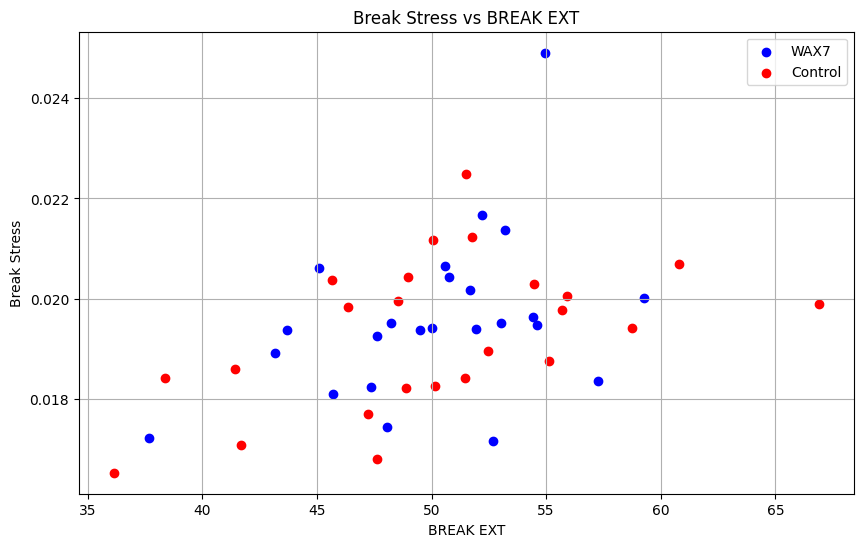

In [12]:
plt.figure(figsize=(10, 6))

# Plot for df_wax7
plt.scatter(df_wax7['BREAK EXT'], df_wax7['BREAK STRESS'], color='blue', label='WAX7')

# Plot for df_ctrl
plt.scatter(df_ctrl['BREAK EXT'], df_ctrl['BREAK STRESS'], color='red', label='Control')

plt.xlabel('BREAK EXT')
plt.ylabel('Break Stress')
plt.title('Break Stress vs BREAK EXT')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
df_wax7 = df_wax7[(df_wax7['BREAK EXT'] >= 40)]
df_ctrl = df_ctrl[(df_ctrl['BREAK EXT'] >= 40)]
len(df_wax7), len(df_ctrl)

(23, 22)

In [14]:
correlation = df_ctrl['BREAK EXT'].corr(df_ctrl['BREAK STRESS'])
correlation

0.3541870787028562

In [15]:
correlation = df_wax7['BREAK EXT'].corr(df_wax7['BREAK STRESS'])
correlation

0.28097934040455014

In [16]:
np.median(df_ctrl['BREAK STRESS']), np.median(df_wax7['BREAK STRESS'])

(0.019805, 0.01949)

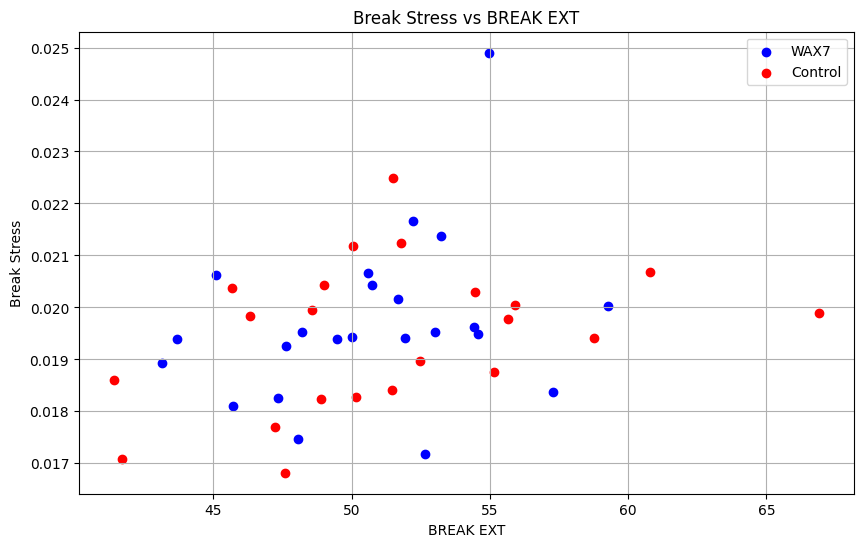

In [17]:
plt.figure(figsize=(10, 6))

# Plot for df_wax7
plt.scatter(df_wax7['BREAK EXT'], df_wax7['BREAK STRESS'], color='blue', label='WAX7')

# Plot for df_ctrl
plt.scatter(df_ctrl['BREAK EXT'], df_ctrl['BREAK STRESS'], color='red', label='Control')

plt.xlabel('BREAK EXT')
plt.ylabel('Break Stress')
plt.title('Break Stress vs BREAK EXT')
plt.legend()
plt.grid(True)
plt.show()